# Process and plot Pu-240 xs covariance matrix with cross terms

In [1]:
import sandy

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [3]:
# ERRORR parameters
ek = sandy.energy_grids.ECCO33  # 33 group energy structure
err = 0.1  # RECONR recostruction tolerance, low for fast calculations
mt = [18, 102]  # select only fission and capture

## JEFF-3.3

In [4]:
errorr = sandy.get_endf6_file("jeff_33", "xs", 942400).get_errorr(err=err, errorr33_kws=dict(mt=mt, ek=ek), verbose=True)
cov = errorr["errorr33"].get_cov()

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    


moder
20 -21 /
reconr
-21 -22 /
'sandy runs njoy'/
9440 0 0 /
0.1 0. /
0/
moder
-22 30 /
errorr
-21 -22 0 33 0 /
9440 1 2 0 1 /
0 0.0 /
1 33 0/
2 0 /
18 102 /
33 /
1.00001e-05 1.00000e-01 5.40000e-01 4.00000e+00 8.31529e+00 1.37096e+01 2.26033e+01 4.01690e+01 6.79040e+01 9.16609e+01 1.48625e+02 3.04325e+02 4.53999e+02 7.48518e+02 1.23410e+03 2.03468e+03 3.35463e+03 5.53084e+03 9.11882e+03 1.50344e+04 2.47875e+04 4.08677e+04 6.73795e+04 1.11090e+05 1.83156e+05 3.01974e+05 4.97871e+05 8.20850e+05 1.35335e+06 2.23130e+06 3.67879e+06 6.06531e+06 1.00000e+07 1.96403e+07 /
stop

 njoy 2016.74  12Jan24                                       01/18/24 18:50:25
 *****************************************************************************

 moder...                                                                 0.0s

 reconr...                                                                0.1s



 moder...                                                                 0.9s



 errorr...                                                                1.3s

 processing mat  9440
 ---------------------
  94-Pu-240   CEA      EVAL-FEV16 CEA/DAM CEA/DEN collaboration      

 covariances calculated for  2 reactions and   75 groups                  1.4s
                                                                          1.4s
 *****************************************************************************


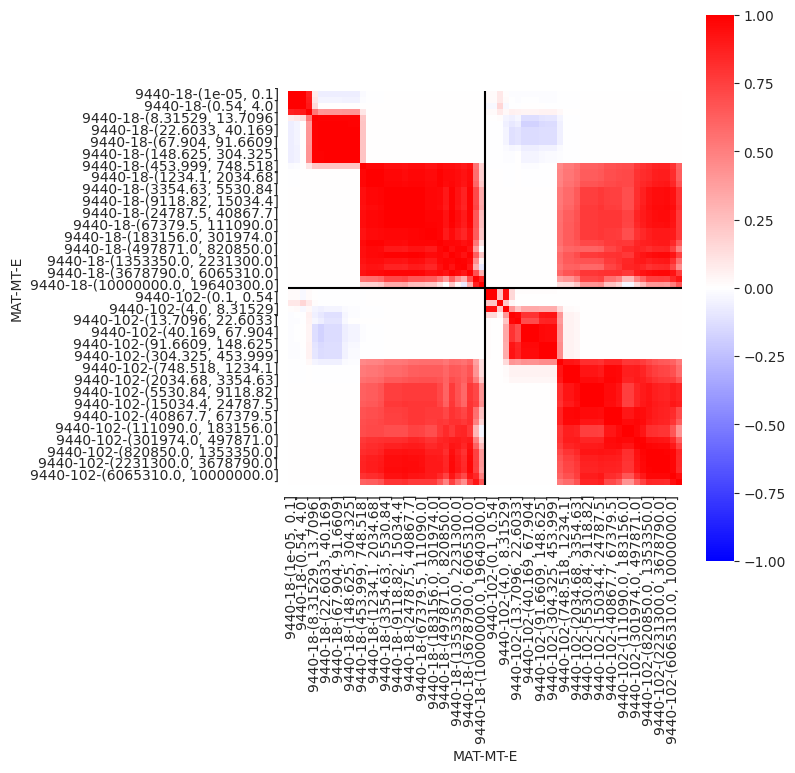

In [5]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.set_aspect("equal")
sns.heatmap(cov.get_corr().data, cmap="bwr", vmin=-1, vmax=1)
ax.axhline(33, color='k')
ax.axvline(33, color='k')
fig.tight_layout()

## ENDF/B-VIII.0

In [6]:
errorr = sandy.get_endf6_file("endfb_80", "xs", 942400).get_errorr(
    err=err,
    errorr33_kws=dict(
        ek=ek,
        mt=mt,
        irespr=0,  # faster handling of resonance parameters
    ),
    nubar=False,  # skip nubar
    chi=False,  # skip chi
    verbose=True,
)
cov = errorr["errorr33"].get_cov()

INFO:  Zero or no temperature was requested, NJOY processing will stop after RECONR.
    If you want to process 0K cross sections use `temperature=0.1`.
    


moder
20 -21 /
reconr
-21 -22 /
'sandy runs njoy'/
9440 0 0 /
0.1 0. /
0/
moder
-22 30 /
errorr
-21 -22 0 33 0 /
9440 1 2 0 1 /
0 0.0 /
1 33 0/
2 0 /
18 102 /
33 /
1.00001e-05 1.00000e-01 5.40000e-01 4.00000e+00 8.31529e+00 1.37096e+01 2.26033e+01 4.01690e+01 6.79040e+01 9.16609e+01 1.48625e+02 3.04325e+02 4.53999e+02 7.48518e+02 1.23410e+03 2.03468e+03 3.35463e+03 5.53084e+03 9.11882e+03 1.50344e+04 2.47875e+04 4.08677e+04 6.73795e+04 1.11090e+05 1.83156e+05 3.01974e+05 4.97871e+05 8.20850e+05 1.35335e+06 2.23130e+06 3.67879e+06 6.06531e+06 1.00000e+07 1.96403e+07 /
stop

 njoy 2016.74  12Jan24                                       01/18/24 18:50:35
 *****************************************************************************

 moder...                                                                 0.0s



 reconr...                                                                0.8s

 ---message from rdf2bw---calculation of angular distribution not installed.



 moder...                                                                 2.1s



 errorr...                                                                2.7s

 processing mat  9440
 ---------------------
  94-Pu-240 LANL       EVAL-SEP09 YOUNG,TALOU,CHADWICK,KAHLER,KAWAN  

 covariances calculated for  2 reactions and  113 groups                  2.7s
                                                                          2.7s
 *****************************************************************************


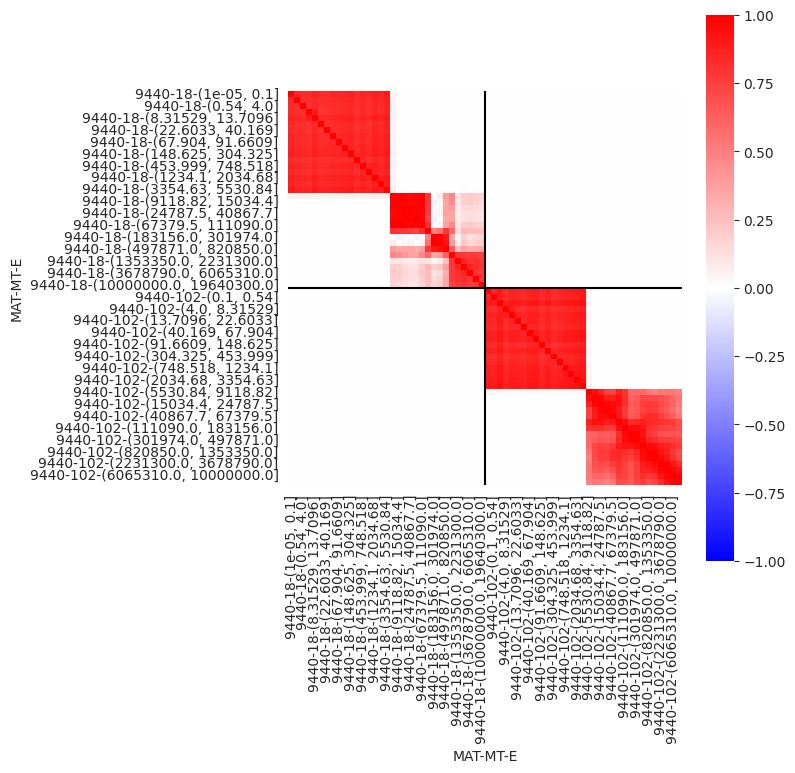

In [7]:
fig, ax = plt.subplots(figsize=(8, 8), dpi=100)
ax.set_aspect("equal")
sns.heatmap(cov.get_corr().data, cmap="bwr", vmin=-1, vmax=1)
ax.axhline(33, color='k')
ax.axvline(33, color='k')
fig.tight_layout()